# Association Rules

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset, here you can use the same path you used in the previous notebook
df = pd.read_csv("/content/drive/MyDrive/Unsupervised Learning/Data/Import_data_cleansed.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DECLARATION ID       7864 non-null   object 
 1   DECLARATION DATE     7864 non-null   object 
 2   IMPORTER_TIN         7864 non-null   int64  
 3   IMPORT_COMPANY_NAME  7864 non-null   object 
 4   COUNTRY OF ORIGIN    7864 non-null   object 
 5   FOB VALUE            7864 non-null   float64
 6   HS CODE              7864 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 430.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DECLARATION ID,DECLARATION DATE,IMPORTER_TIN,IMPORT_COMPANY_NAME,COUNTRY OF ORIGIN,FOB VALUE,HS CODE
0,ADDL1090435,01.Mar.22,102079981,NR JOB DAUDI MASIMA,Israel,23097.10,420212000000
1,ADDL1089767,01.Mar.22,100103559,ESSEGEE HOUSEHOLD STORE LIMITED.,China,100599.86,820420000000
2,ADDA1091117,01.Mar.22,133069143,KENU EQUIPMENT LIMITED,United States,0.00,730792000000
3,ADDA1089579,01.Mar.22,142479281,NEE TECH & SERVICES LIMITED,Japan,10462986.30,481690000000
4,ADDL1090103,01.Mar.22,107893245,unknown,China,523842.23,961511000000


In [ ]:
# Creating a one-hot encoded matrix. Apriori requires data in this format.
basket = (df.groupby(['DECLARATION ID', 'HS CODE'])['HS CODE']
          .count().unstack().reset_index().fillna(0)
          .set_index('DECLARATION ID'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Converting all non-zero counts to 1 for one-hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# Applying the encoding function to the dataset
basket_sets = basket.applymap(encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The error message suggests that the DataFrame frequent_itemsets generated by the Apriori algorithm is empty. This can happen if the min_support parameter is set too high, meaning that no itemsets meet that threshold, hence generating an empty DataFrame. Now we need to adjust the parameter to get a better output.



In [ ]:
# Generating frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

# Creating association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: ignored

In [ ]:
best_rules = None
best_metric_value = -1
best_support = 0
best_threshold = 0

# Assuming one_hot_df is your one-hot encoded DataFrame
# Loop through different min_support values
for min_support in np.linspace(0.001, 0.2, 20):  # Adjust the range and step size as necessary
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)

    # If frequent_itemsets are empty, continue to the next iteration
    if frequent_itemsets.shape[0] == 0:
        continue

    # Loop through different min_threshold values
    for min_threshold in np.linspace(0.1, 3, 30):  # Adjust the range and step size as necessary
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

        # If rules are empty, continue to the next iteration
        if rules.shape[0] == 0:
            continue

        # Here, you can define what 'valuable' means to you; in this example, I use 'max(lift)'
        metric_value = rules['lift'].max()

        if metric_value > best_metric_value:
            best_rules = rules
            best_metric_value = metric_value
            best_support = min_support
            best_threshold = min_threshold

print(best_rules)
print(f'Best min_support: {best_support}, Best min_threshold: {best_threshold}')
print(f'Max lift value: {best_metric_value}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

         antecedents                                        consequents  \
0      (40299000000)                                      (40310000000)   
1      (40310000000)                                      (40299000000)   
2      (40690000000)                                      (40299000000)   
3      (40299000000)                                      (40690000000)   
4     (180690000000)                                      (40299000000)   
...              ...                                                ...   
3377  (610342000000)  (620342000000, 611120000000, 621210000000, 640...   
3378  (621210000000)  (620342000000, 611120000000, 610342000000, 640...   
3379  (610711000000)  (620342000000, 611120000000, 610342000000, 621...   
3380  (640419000000)  (620342000000, 611120000000, 610342000000, 621...   
3381  (610910000000)  (620342000000, 611120000000, 610342000000, 621...   

      antecedent support  consequent support   support  confidence  \
0               0.001188     

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in wors

In [ ]:
# Generating frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)

# Creating association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(40299000000),(40310000000),0.001188,0.001188,0.001188,1.0,841.5,0.001187,inf,1.000000
1,(40310000000),(40299000000),0.001188,0.001188,0.001188,1.0,841.5,0.001187,inf,1.000000
2,(40690000000),(40299000000),0.001485,0.001188,0.001188,0.8,673.2,0.001187,4.994058,1.000000
3,(40299000000),(40690000000),0.001188,0.001485,0.001188,1.0,673.2,0.001187,inf,0.999703
4,(180690000000),(40299000000),0.001485,0.001188,0.001188,0.8,673.2,0.001187,4.994058,1.000000


The highlight_metrics function colors cells in the 'lift' and 'confidence' columns yellow if their values are greater than 1, to make them easily identifiable.

Confidence
Confidence measures the likelihood of the consequent (output or result item) occurring given the antecedent (input or condition item). In other words, it quantifies how often a rule is expected to be true. Mathematically, it's defined as:

$$
\text{Confidence}(A \rightarrow B) = \frac{\text{Support}(A \cup B)}{\text{Support}(A)}
$$



A confidence of 1 means that the antecedent and consequent always appear together in the dataset. However, high confidence does not necessarily imply a strong, useful rule; it may simply indicate a common occurrence.

Lift
Lift measures how much more likely the antecedent and consequent occur together compared to if they were statistically independent. Lift is defined as:

$$
\text{Lift}(A \rightarrow B) = \frac{\text{Confidence}(A \rightarrow B)}{\text{Support}(B)}
$$

A lift value of 1 indicates that the likelihood of the antecedent and consequent occurring together is no different than random.
A lift greater than 1 suggests that the antecedent and consequent are more likely to occur together than separately, indicating a potentially useful rule.
A lift less than 1 suggests that the items are unlikely to be bought together.


**Confidence** tells us how often the items A and B occur together, given the number times A occurs.
**Lift** tells us how much more likely A and B are to occur together than if they were independent.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


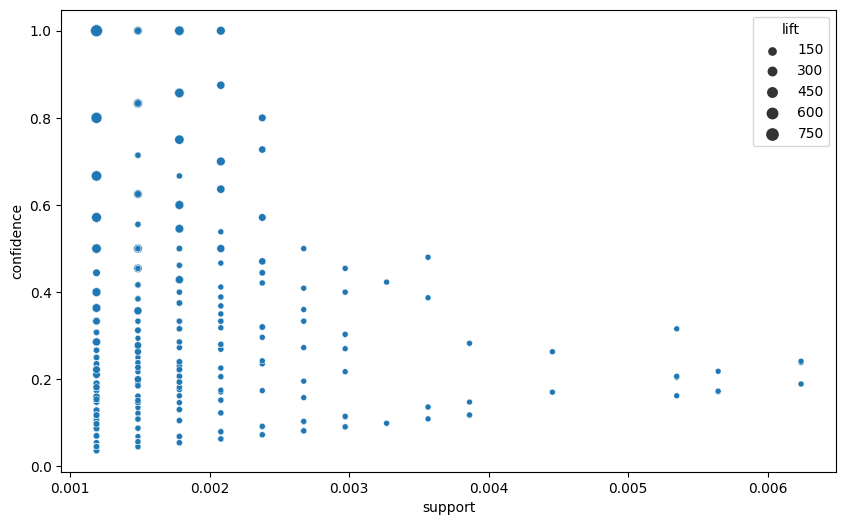

In [ ]:
# Creating a scatter plot for visualizing support vs confidence, sized by lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.show()

**Chart Components:**


*  X-axis (Support): This axis represents the frequency with which the  items in the rule appear together in the dataset. Higher support values indicate that the rule is more commonly observed.
*   **Y-axis (Confidence):** On this axis, you find the likelihood that the 'consequent' will appear in a transaction given the 'antecedent' is present. Higher confidence values imply a stronger rule.
*   **Marker Size (Lift):** The size of each point on the scatter plot represents the 'Lift' of the rule. Lift indicates the strength of a rule over random co-occurrence of the antecedent and the consequent. A larger marker means a higher lift value, indicating a stronger association.


**What You Can Infer:**


1.   **Quadrants:**


> *  Top-Right: Rules in this quadrant have both high support and high confidence, making them strong candidates for actionable insights.
*  Bottom-Right: Rules here have low support but high confidence. These are more like "hidden gems" but are not common enough to be a major focus.
* Top-Left: Rules with high support but low confidence may indicate frequent items but not necessarily strong associations.
*  Bottom-Left: Low support and low confidence rules are generally not very useful.

2.   Marker Size:

 Larger markers, regardless of their position, point to a stronger association between the antecedent and consequent. Such rules, especially if they also have high support and confidence, should be particularly interesting for further investigation.

3.   Density:

Areas of the chart with a higher density of points might indicate a cluster of similar rules that could warrant closer inspection as a group.

The scatter plot thus allows you to quickly assess the quality of your rules, prioritizing them based on their likelihood of occurrence (support), their reliability (confidence), and their strength (lift).

**Interpretability**

The more rules you have, the harder it might be to draw actionable insights. If many rules are closely related or variations of each other, they may not provide distinct actionable insights.

**Computational Resources**

While this number of rules is likely not a computational concern given modern hardware capabilities, it can make manual review or interpretation more challenging.

From a practical standpoint, you'll want rules that lead to actionable insights for Customs administrations.It may be beneficial to filter down to rules with exceptionally high confidence and lift, for example, to target areas most in need of attention.

In [ ]:
# Sorting the rules by lift and then by confidence
sorted_rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

# Selecting the top 10 rules based on the sorting
top_10_rules = sorted_rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate sentences explaining each rule
for i, rule in top_10_rules.iterrows():
    antecedents = ', '.join(map(str, list(rule['antecedents'])))  # Convert to string before join
    consequents = ', '.join(map(str, list(rule['consequents'])))  # Convert to string before join
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']

    print(f"Rule {i+1}: If a declaration contains {antecedents}, it is likely to also contain {consequents}. "
          f"This rule has a support of {support:.2f}, a confidence of {confidence:.2f}, and a lift of {lift:.2f}.")

Rule 1: If a declaration contains 40299000000, it is likely to also contain 40310000000. This rule has a support of 0.00, a confidence of 1.00, and a lift of 841.50.
Rule 2: If a declaration contains 40310000000, it is likely to also contain 40299000000. This rule has a support of 0.00, a confidence of 1.00, and a lift of 841.50.
Rule 541: If a declaration contains 40690000000, 40310000000, it is likely to also contain 40299000000. This rule has a support of 0.00, a confidence of 1.00, and a lift of 841.50.
Rule 542: If a declaration contains 40690000000, 40299000000, it is likely to also contain 40310000000. This rule has a support of 0.00, a confidence of 1.00, and a lift of 841.50.
Rule 545: If a declaration contains 40310000000, it is likely to also contain 40690000000, 40299000000. This rule has a support of 0.00, a confidence of 1.00, and a lift of 841.50.
Rule 546: If a declaration contains 40299000000, it is likely to also contain 40690000000, 40310000000. This rule has a suppo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule 1: If a declaration contains "Milk and Cream", it is likely to also contain "Yogurt".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 2: If a declaration contains "Yogurt", it is likely to also contain "Milk and Cream".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 541: If a declaration contains "Cheese", "Yogurt", it is likely to also contain "Milk and Cream".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 542: If a declaration contains "Cheese", "Milk and Cream", it is likely to also contain "Yogurt".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 545: If a declaration contains "Yogurt", it is likely to also contain "Cheese", "Milk and Cream".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 546: If a declaration contains "Milk and Cream", it is likely to also contain "Cheese", "Yogurt".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 547: If a declaration contains "Chocolates", "Yogurt", it is likely to also contain "Milk and Cream".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 548: If a declaration contains "Chocolates", "Milk and Cream", it is likely to also contain "Yogurt".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 551: If a declaration contains "Yogurt", it is likely to also contain "Chocolates", "Milk and Cream".
Support: 0.00, Confidence: 1.00, Lift: 841.50

Rule 552: If a declaration contains "Milk and Cream", it is likely to also contain "Chocolates", "Yogurt".
Support: 0.00, Confidence: 1.00, Lift: 841.50

These rules, despite having low support, have high confidence and lift, which suggests that when the antecedents are present, the consequents are almost certain to be present as well. This could be an area worth exploring for targeted inspections or efficiency improvements.

* **Targeted Inspections**: Customs authorities could consider using these rules to target inspections more effectively. For example, if they come across a declaration containing "Milk and Cream," they can be almost certain that "Yogurt" (or other associated items) is present as well. This knowledge can help inspectors focus their efforts on high-risk declarations more efficiently.
* **Data Validation**: These rules can also be used for data validation. If a declaration claims to contain "Milk and Cream" but does not declare "Yogurt," it might raise a flag for further inspection or validation.
* **Efficiency Improvements**: Customs administrations can streamline their processes by taking into account these strong associations. For example, they might consider grouping related items together for faster processing or automating certain clearance procedures for declarations that meet these criteria.